# Get Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from xbbg import blp

In [180]:
MonthCode ={1 : "F",
            2 : "G",
            3 : "H",
            4 : "J",
            5 : "K",
            6 : "M",
            7 : "N",
            8 : "Q",
            9 : "U",
            10 : "V",
            11 : "X",
            12 : "Z"}
# CalendarMonth = { MonthCode[k]:k for k in MonthCode}

In [2]:
Start = "19910101"
End = pd.to_datetime("today").strftime("%Y%m%d")

Index = blp.bdh(tickers= "XAUXAG Curncy",start_date = Start , end_date = End)

In [5]:
Index.columns = ["XAUXAG"]

In [67]:
GCContract = ["G", "J", "M", "Q", "V", "Z"]
SIContract = ["H", "K", "N", "U", "Z"]

In [10]:
Test = blp.bdh(tickers= "GCJ19 Comdty",start_date = "20000101" , end_date = "20200611")

In [11]:
Test

ticker,GCJ19 Comdty
field,Last_Price
2017-05-30,1300.8
2017-05-31,1310.4
2017-06-01,1305.1
2017-06-02,1315.3
2017-06-05,1317.8
...,...
2019-04-22,1273.5
2019-04-23,1269.3
2019-04-24,1275.5


In [ ]:
Commo = "GC"
for Contract in GCContract:
    for x in range(90, 120, 1):
        print (Commo + Contract + str(x)[-2:])
        Pointer = blp.bdh(tickers= Commo + Contract + str(x)[-2:] + " Comdty",start_date = "19800101" , end_date = "20220611")
        Pointer.to_csv(Commo + Contract + str(x)[-2:] + ".csv", header = False)

In [68]:
Commo = "SI"
for Contract in SIContract:
    for x in range(90, 120, 1):
        print (Commo + Contract + str(x)[-2:])
        Pointer = blp.bdh(tickers= Commo + Contract + str(x)[-2:] + " Comdty",start_date = "19800101" , end_date = "20220611")
        Pointer.to_csv(Commo + Contract + str(x)[-2:] + ".csv", header = False)

SIH90
SIH91
SIH92
SIH93
SIH94
SIH95
SIH96
SIH97
SIH98
SIH99
SIH00
SIH01
SIH02
SIH03
SIH04
SIH05
SIH06
SIH07
SIH08
SIH09
SIH10
SIH11
SIH12
SIH13
SIH14
SIH15
SIH16
SIH17
SIH18
SIH19
SIK90
SIK91
SIK92
SIK93
SIK94
SIK95
SIK96
SIK97
SIK98
SIK99
SIK00
SIK01
SIK02
SIK03
SIK04
SIK05
SIK06
SIK07
SIK08
SIK09
SIK10
SIK11
SIK12
SIK13
SIK14
SIK15
SIK16
SIK17
SIK18
SIK19
SIN90
SIN91
SIN92
SIN93
SIN94
SIN95
SIN96
SIN97
SIN98
SIN99
SIN00
SIN01
SIN02
SIN03
SIN04
SIN05
SIN06
SIN07
SIN08
SIN09
SIN10
SIN11
SIN12
SIN13
SIN14
SIN15
SIN16
SIN17
SIN18
SIN19
SIU90
SIU91
SIU92
SIU93
SIU94
SIU95
SIU96
SIU97
SIU98
SIU99
SIU00
SIU01
SIU02
SIU03
SIU04
SIU05
SIU06
SIU07
SIU08
SIU09
SIU10
SIU11
SIU12
SIU13
SIU14
SIU15
SIU16
SIU17
SIU18
SIU19
SIZ90
SIZ91
SIZ92
SIZ93
SIZ94
SIZ95
SIZ96
SIZ97
SIZ98
SIZ99
SIZ00
SIZ01
SIZ02
SIZ03
SIZ04
SIZ05
SIZ06
SIZ07
SIZ08
SIZ09
SIZ10
SIZ11
SIZ12
SIZ13
SIZ14
SIZ15
SIZ16
SIZ17
SIZ18
SIZ19


### Recent ones

In [73]:
Commo = "SI"
for x in range(2):
    for Contract in SIContract:
        print (Commo + Contract + str(x)[-2:])
        Pointer = blp.bdh(tickers= Commo + Contract + str(x) + " Comdty",start_date = "19800101" , end_date = "20220611")
        Pointer.to_csv(Commo + Contract + str(x) + ".csv", header = False)

SIH0
SIK0
SIN0
SIU0
SIZ0
SIH1
SIK1
SIN1
SIU1
SIZ1


### Check

In [242]:
GCAll = None

for Year in range(90, 120, 1):
    for Contract in GCContract:
        Runner = pd.read_csv("GC" + Contract + str(Year)[-2:] +".csv", index_col = 0, header=None)
        Runner.index = pd.to_datetime(Runner.index)
        Runner = Runner[Runner.index < pd.Timestamp(year=Runner.index.year.max(), month=CalendarMonth[Contract], day = 1)]

        if GCAll is None:
            GCAll = Runner
        else:
            Runner = Runner[Runner.index > GCAll.index.max()]
            GCAll = pd.concat((GCAll, Runner), axis = 0)
for Year in range(2):
    for Contract in GCContract:
        Runner = pd.read_csv("GC" + Contract + str(Year) +".csv", index_col = 0, header=None)
        Runner.index = pd.to_datetime(Runner.index)
        Runner = Runner[Runner.index < pd.Timestamp(year=Runner.index.year.max(), month=CalendarMonth[Contract], day = 1)]

        if GCAll is None:
            GCAll = Runner
        else:
            Runner = Runner[Runner.index > GCAll.index.max()]
            GCAll = pd.concat((GCAll, Runner), axis = 0)

In [243]:
SIAll = None

for Year in range(90, 120, 1):
    for Contract in SIContract:
        Runner = pd.read_csv("SI" + Contract + str(Year)[-2:] +".csv", index_col = 0, header=None)
        Runner.index = pd.to_datetime(Runner.index)
        Runner = Runner[Runner.index < pd.Timestamp(year=Runner.index.year.max(), month=CalendarMonth[Contract], day = 1)]

        if SIAll is None:
            SIAll = Runner
        else:
            Runner = Runner[Runner.index > SIAll.index.max()]
            SIAll = pd.concat((SIAll, Runner), axis = 0)
for Year in range(2):
    for Contract in SIContract:
        Runner = pd.read_csv("SI" + Contract + str(Year) +".csv", index_col = 0, header=None)
        Runner.index = pd.to_datetime(Runner.index)
        Runner = Runner[Runner.index < pd.Timestamp(year=Runner.index.year.max(), month=CalendarMonth[Contract], day = 1)]

        if SIAll is None:
            SIAll = Runner
        else:
            Runner = Runner[Runner.index > SIAll.index.max()]
            SIAll = pd.concat((SIAll, Runner), axis = 0)

In [258]:
Strat = (GCAll / SIAll).dropna()

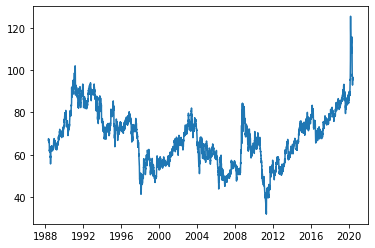

In [259]:
plt.plot(Strat)

In [260]:
Data = pd.concat((GCAll, SIAll, Strat), axis = 1)

In [262]:
Data.columns = ["GC", "SI", "Ratio"]

In [264]:
Data.to_csv("Data.csv")

# Test intraday

In [9]:
Data = pd.read_csv("DATA.csv")

In [10]:
Data

,0,GC,SI,Ratio
0,1988-03-31,513.6,NaN,NaN
1,1988-04-04,516.4,NaN,NaN
2,1988-04-05,511.7,NaN,NaN
3,1988-04-06,505.9,NaN,NaN
4,1988-04-07,507.3,NaN,NaN
...,...,...,...,...
8089,2020-06-05,1683.0,17.479,96.286973
8090,2020-06-08,1705.1,17.893,95.294249
8091,2020-06-09,1721.9,17.794,96.768574
8092,2020-06-10,1720.7,17.796,96.690267


In [11]:
Data.Ratio

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
8089    96.286973
8090    95.294249
8091    96.768574
8092    96.690267
8093    95.958092
Name: Ratio, Length: 8094, dtype: float64

In [13]:
test = pd.read_clipboard()

In [14]:
test

,Alias Underlying RIC,Date-Time,Type,Last,Volume,No. Trades,Close Bid,Close Ask
0,GCN0,2010-05-31T15:00:00.000000000Z,Intraday 10Min,1217.200,3.0,3.0,1218.300,1218.600
1,GCN0,2010-05-31T15:10:00.000000000Z,Intraday 10Min,1217.900,8.0,7.0,1217.700,1218.000
2,GCN0,2010-05-31T15:20:00.000000000Z,Intraday 10Min,1218.000,2.0,2.0,1217.700,1218.000
3,GCN0,2010-05-31T15:30:00.000000000Z,Intraday 10Min,1217.700,3.0,1.0,1217.700,1218.000
4,GCN0,2010-05-31T15:40:00.000000000Z,Intraday 10Min,1217.100,16.0,8.0,1217.200,1218.000
...,...,...,...,...,...,...,...,...
1048570,SIQ9,2019-07-25T17:30:00.000000000Z,Intraday 10Min,16.365,1.0,1.0,16.365,16.375
1048571,SIQ9,2019-07-25T17:40:00.000000000Z,Intraday 10Min,NaN,NaN,NaN,16.365,16.375
1048572,SIQ9,2019-07-25T17:50:00.000000000Z,Intraday 10Min,NaN,NaN,NaN,16.370,16.380
1048573,SIQ9,2019-07-25T18:00:00.000000000Z,Intraday 10Min,16.390,29.0,7.0,16.385,16.395
